# Breast Cancer Wisconsin (Diagnostic) Classification

In [1]:
#Importing libraries and dataset
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
sns.set_style("whitegrid")

Importing dataset 

In [2]:
df = pd.read_csv("wdbc.data", names =['ID','diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'] )

In [3]:
df.head()

,ID,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


data set contains 32 columns and 569 rows with no missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
ID                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
df.describe()

,ID,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Dropping the 'ID' column

In [6]:
df = df.drop('ID', axis = 1)

grouping the respective features together for future reference

In [7]:
cols = list(df.columns)

mean_features = df[cols[1:11] + [cols[0]]]
standard_error_features = df[cols[11:21] + [cols[0]]]
worst_features = df[cols[21:31] + [cols[0]]]

visualizing the data

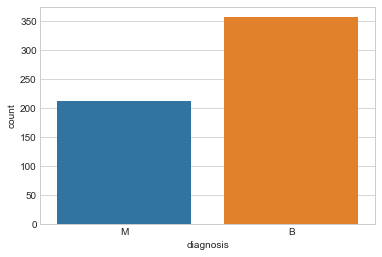

In [8]:
sns.countplot(df['diagnosis'], label = "Count")

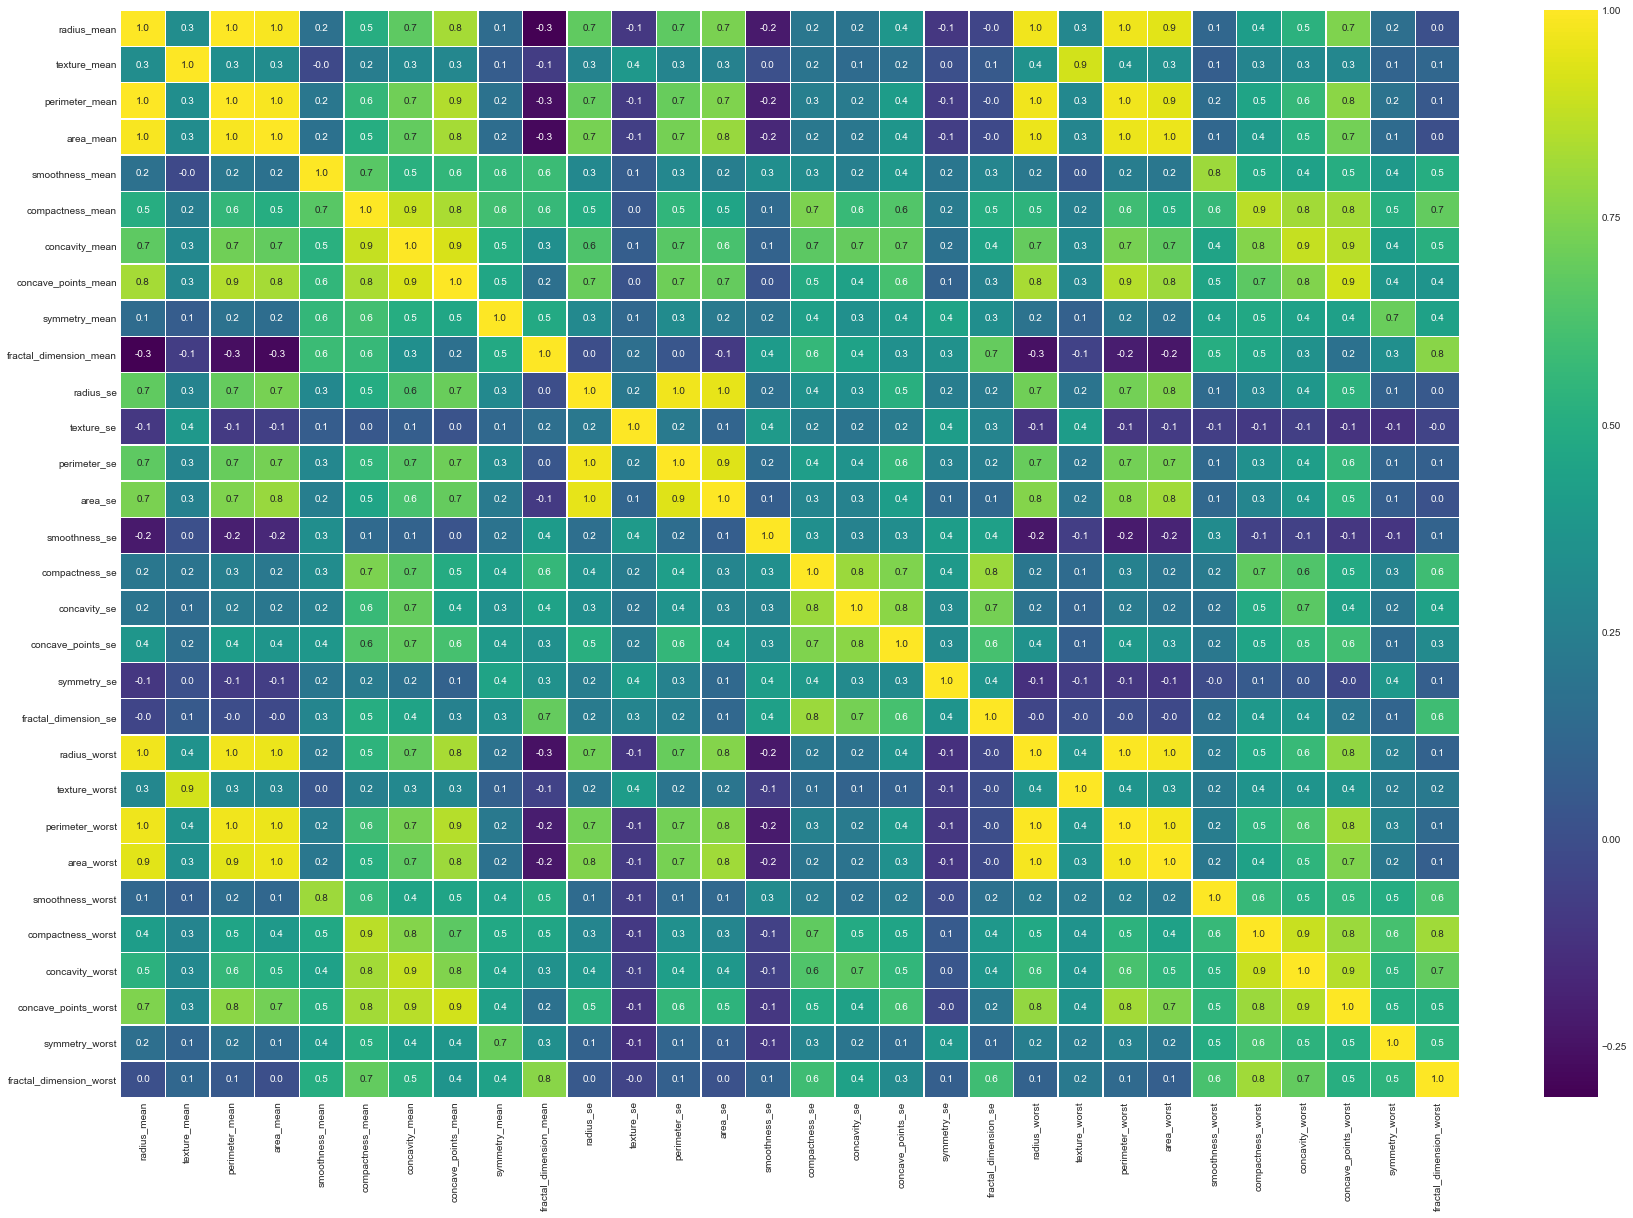

In [9]:
plt.figure(figsize=(30,20)) 
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',cmap = 'viridis')

C:\Users\puneeth\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


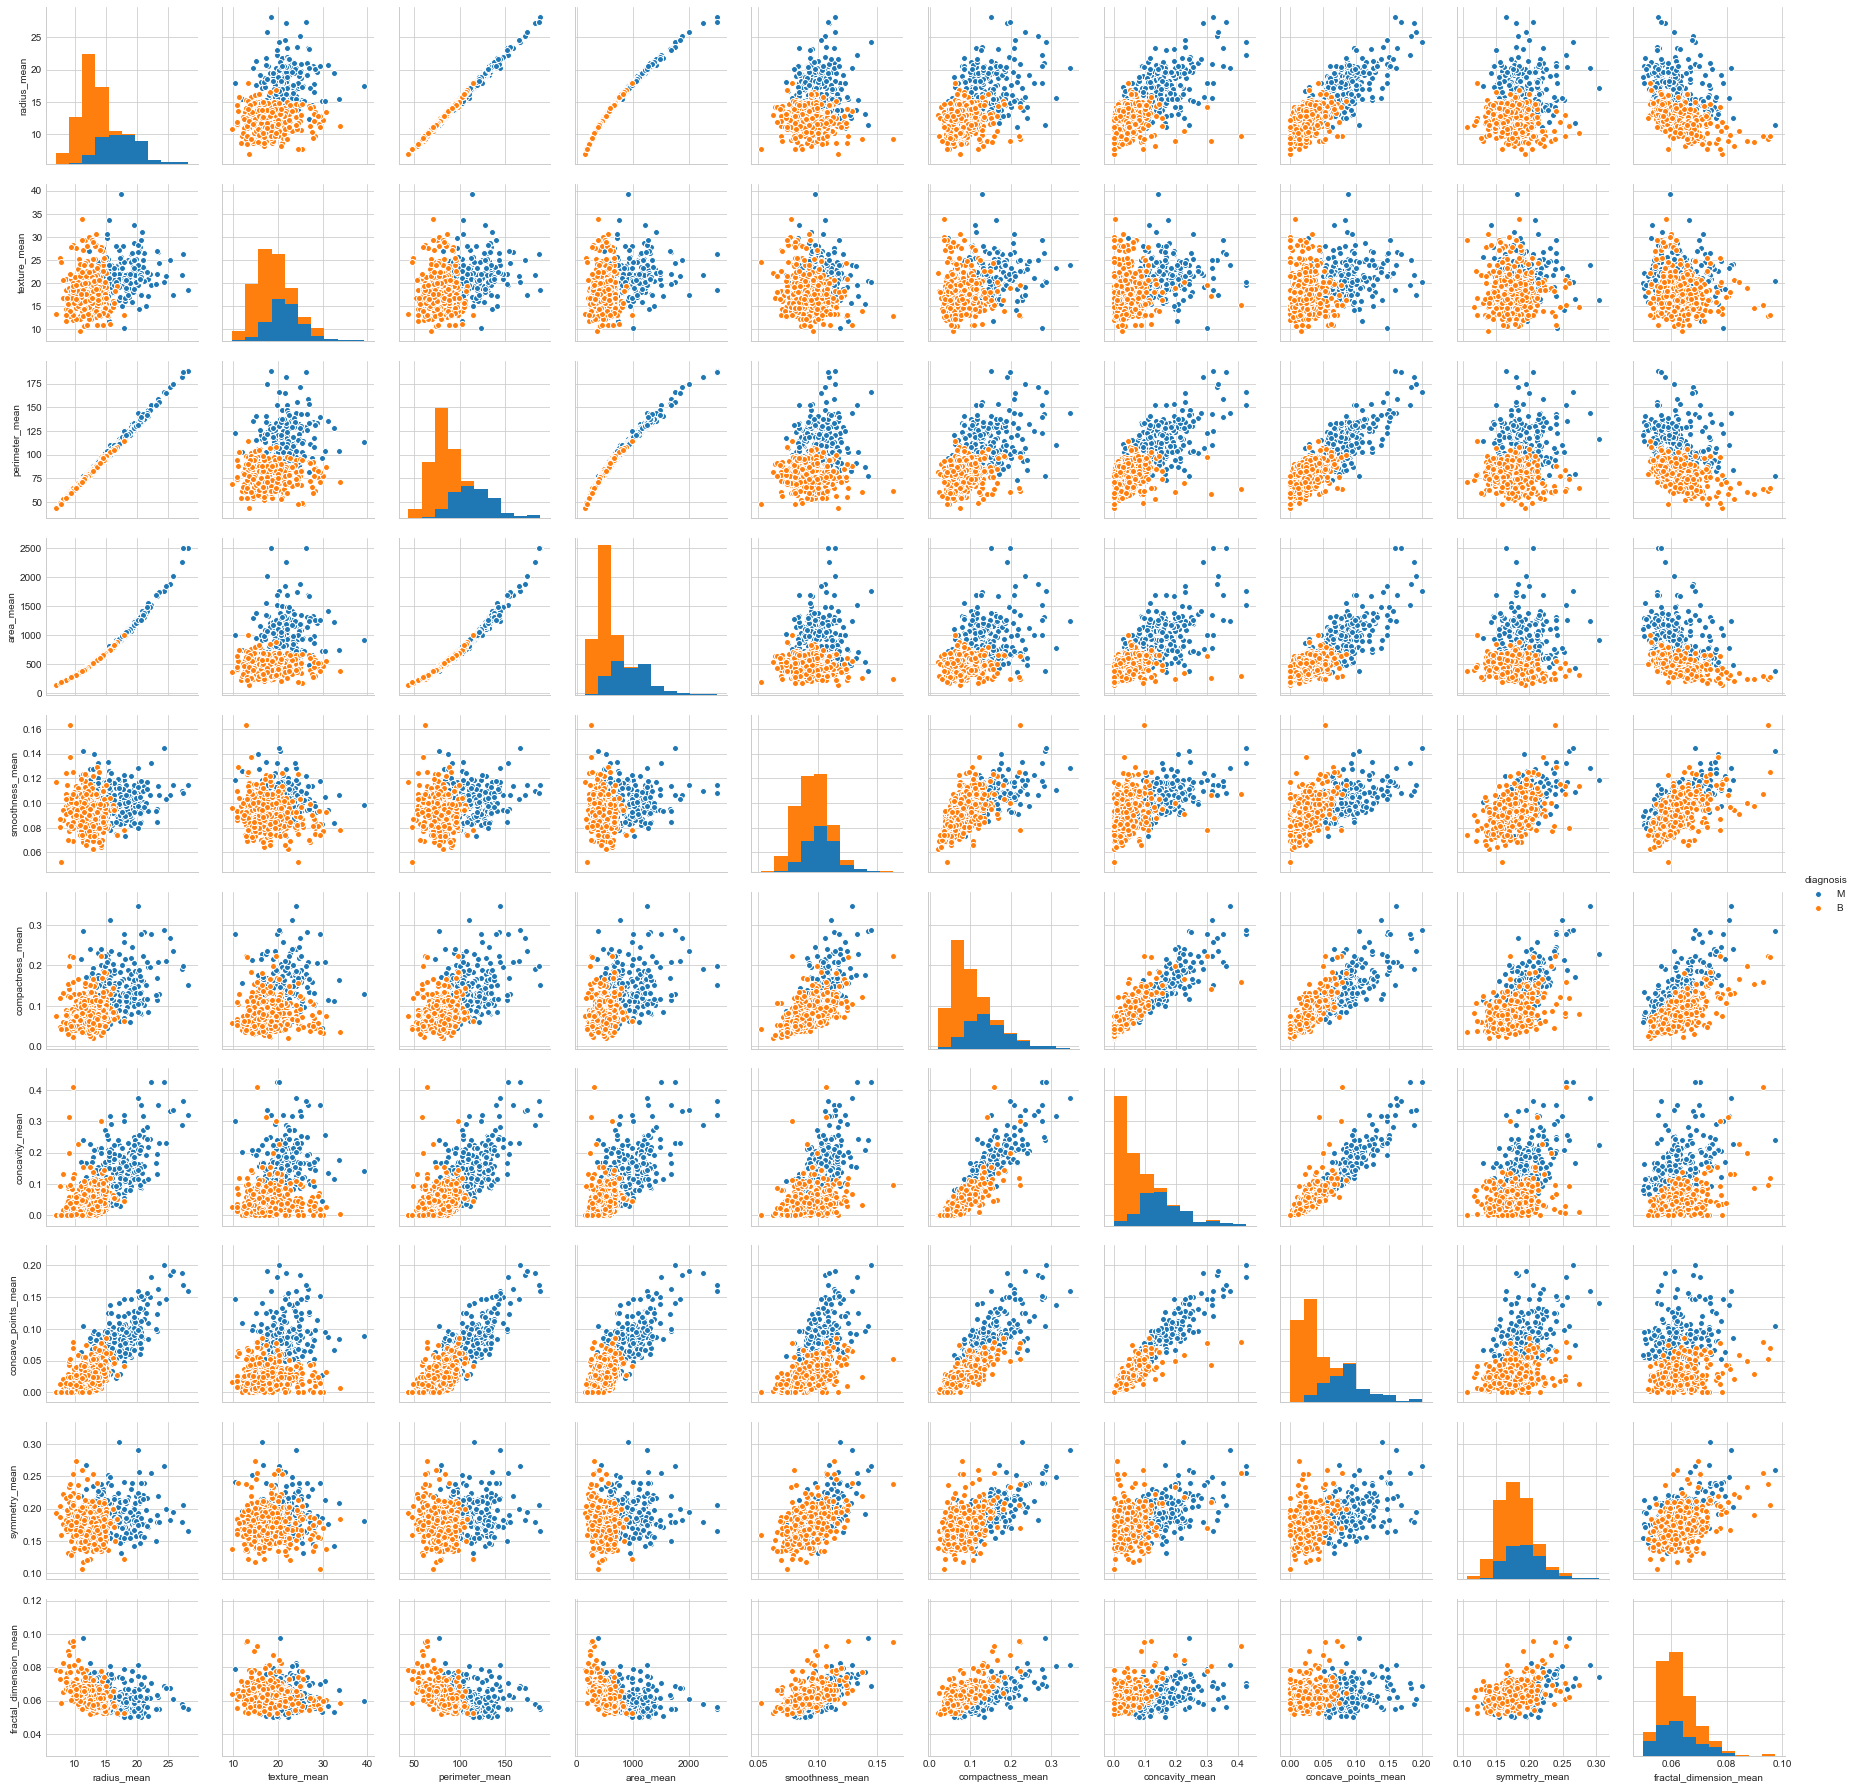

In [98]:
sns.pairplot(data = mean_features,hue = 'diagnosis')

If we notice clearly the "mean" columns are highly correlated with the "worst" columns.

also, the radius coulums are highly correlated to permiter and the area columns.

apart from that, compactness, concavity, concave pointsare also correlated

only one of these columns which are highly correlated should be used for building the model in order to avoid multicolinearity.

dropping worst columns

In [10]:
df = df.drop( ['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'] , axis = 1)

dropping perimter and area columns

In [11]:
df = df.drop( ['perimeter_mean',
       'area_mean','perimeter_se', 'area_se'] , axis = 1)

dropping concavity and concave points

In [12]:
df = df.drop(['concavity_mean',
       'concave_points_mean','concavity_se', 'concave_points_se'], axis = 1)

just to double check if there the columns are correlated

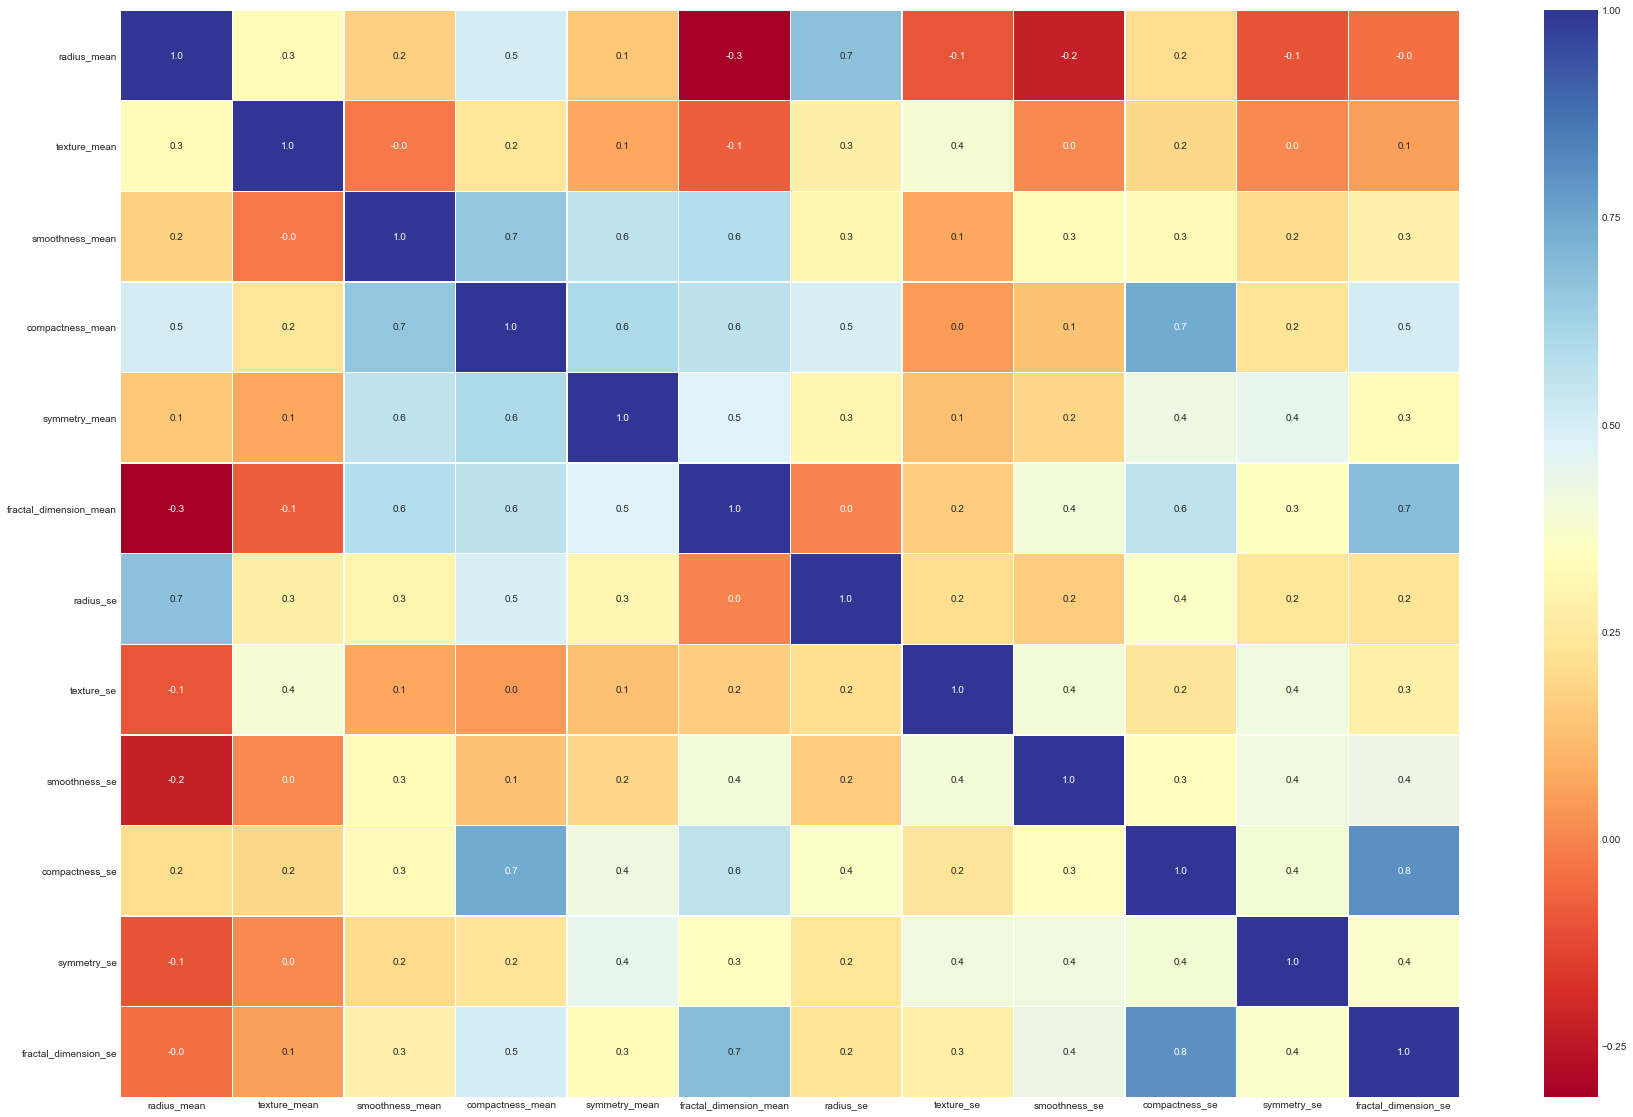

In [13]:
plt.figure(figsize=(30,20)) 
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',cmap = 'RdYlBu')

#Preparing the Data

In [14]:
Target_map = {"B" : 1 ,"M" : 0}

df["diagnosis"] = df["diagnosis"].map(Target_map)

In [15]:
X = df.drop( 'diagnosis',axis=1)     
Y = df['diagnosis']

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1,stratify = Y)

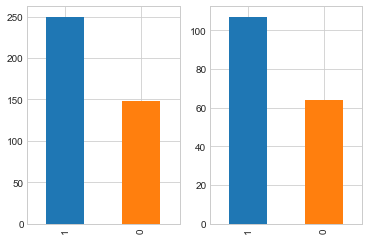

In [17]:
plt.subplot(1,2,1)
y_train.value_counts().plot(kind = 'bar')

plt.subplot(1,2,2)
y_test.value_counts().plot(kind = 'bar')
plt.show()

Logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter = 100)

model_lr.fit(x_train, y_train)

y_predict_lr= model_lr.predict(x_test)


Accuracy of Logistic regression model is 90.05847953216374%


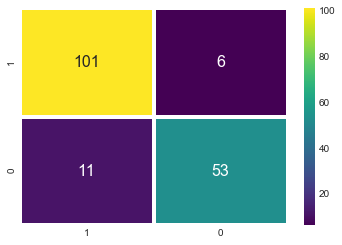

In [26]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

cm_lr = metrics.confusion_matrix(y_test, y_predict_lr,labels=[1,0])
sns.heatmap(cm_lr, annot= True, yticklabels = [1,0], xticklabels = [1,0], cmap = 'viridis',annot_kws={"size": 16},linewidths= 3,fmt='g')

print("")

print("Accuracy of Logistic regression model is {}%".format(accuracy_score(y_test, y_predict_lr)*100))

K-Nearest Neighbours

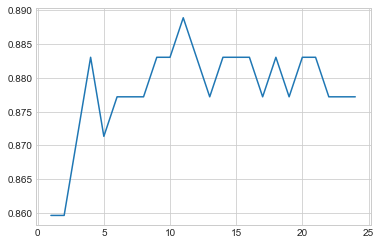

In [30]:
#checking what value of 'K' gives the highest accuracy on the testing dataset
from sklearn.neighbors import KNeighborsClassifier
scores =[]
for k in range(1,25):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(x_train, y_train)
    scores.append(NNH.score(x_test, y_test))

plt.plot(range(1,25),scores)

In [41]:
model_KNN = KNeighborsClassifier(n_neighbors = 11)

model_KNN.fit(x_train, y_train)

y_predict_KNN= model_KNN.predict(x_test)

Accuracy of K-Nearest Neighbours model is 89.47368421052632%


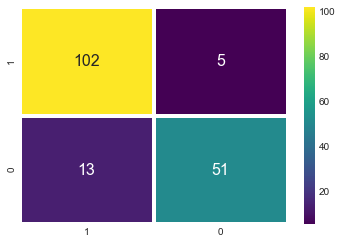

In [42]:
cm_knn = metrics.confusion_matrix(y_test, y_predict_KNN,labels=[1,0])
sns.heatmap(cm_knn, annot= True, yticklabels = [1,0], xticklabels = [1,0], cmap = 'viridis',annot_kws={"size": 16},linewidths= 3,fmt='g')



print("Accuracy of K-Nearest Neighbours model is {}%".format(accuracy_score(y_test, y_predict_KNN)*100))

Support Vector Machine

In [65]:
from sklearn.svm import SVC

model_SVM = SVC(kernel= 'linear',C= 0.01 , gamma = 10 ,probability = True)

model_SVM.fit(x_train, y_train)

y_predict_SVM= model_SVM.predict(x_test)


Accuracy of Support Vector Machine model is 90.64327485380117%


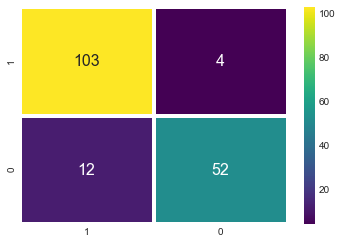

In [66]:
cm_svm = metrics.confusion_matrix(y_test, y_predict_SVM,labels=[1,0])
sns.heatmap(cm_svm, annot= True, yticklabels = [1,0], xticklabels = [1,0], cmap = 'viridis',annot_kws={"size": 16},linewidths= 3,fmt='g')

print("")

print("Accuracy of Support Vector Machine model is {}%".format(accuracy_score(y_test, y_predict_SVM)*100))

Decision Tree Classifier

In [96]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini',max_depth =4)

dTree.fit(x_train, y_train)

y_predict_dTree= dTree.predict(x_test)


Accuracy of Random forest model is 91.81286549707602%


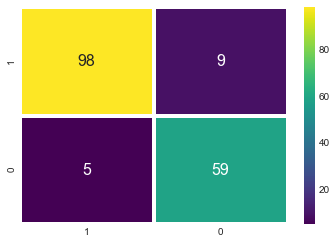

In [97]:
cm_dTree = metrics.confusion_matrix(y_test, y_predict_dTree,labels=[1,0])
sns.heatmap(cm_dTree, annot= True, yticklabels = [1,0], xticklabels = [1,0], cmap = 'viridis',annot_kws={"size": 16},linewidths= 3,fmt='g')

print("")

print("Accuracy of Random forest model is {}%".format(accuracy_score(y_test, y_predict_dTree)*100))

Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier

rfcl = RandomForestClassifier(n_estimators = 100,  max_depth =4)

model_rfcl = rfcl.fit(x_train, y_train)

y_predict_rfcl= model_rfcl.predict(x_test)


Accuracy of Random forest model is 94.15204678362574%


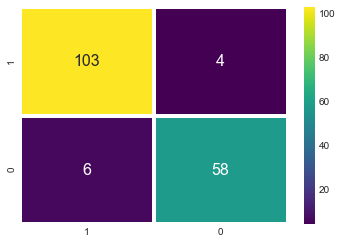

In [89]:
cm_rfcl = metrics.confusion_matrix(y_test, y_predict_rfcl,labels=[1,0])
sns.heatmap(cm_rfcl, annot= True, yticklabels = [1,0], xticklabels = [1,0], cmap = 'viridis',annot_kws={"size": 16},linewidths= 3,fmt='g')

print("")

print("Accuracy of Random forest model is {}%".format(accuracy_score(y_test, y_predict_rfcl)*100))

Random forest classifier turned out to be the model with the best accuracy of 94%

Feature importances

<Container object of 12 artists>

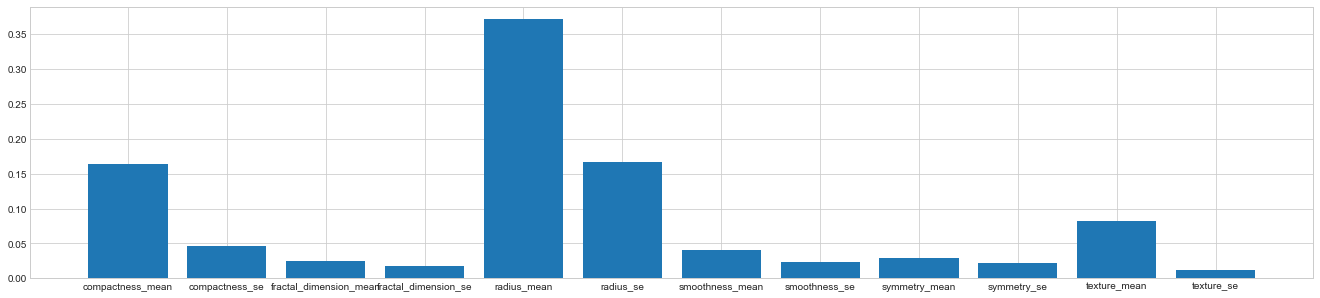

In [128]:
importances = model_rfcl.feature_importances_

plt.figure(figsize=(23,5))
plt.bar(x_train.columns, importances)


plot between test accuracy and train accuracy

94% is the highest possible accuracy

(87, 100)

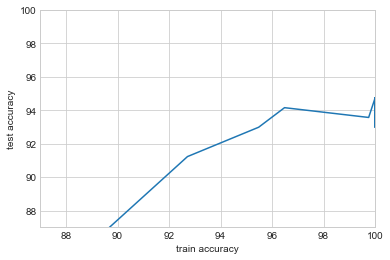

In [181]:
train_accuracy_rfcl = []
test_accuracy_rfcl  = []

for i in range(12):
    rfcl2 = RandomForestClassifier(n_estimators = 100,  max_depth =i+1)
    model_rfcl2 = rfcl2.fit(x_train, y_train)
    
    y_predict_rfcl_train = model_rfcl2.predict(x_train)
    y_predict_rfcl_test  = model_rfcl2.predict(x_test)
    
    train_accuracy_rfcl.append(accuracy_score(y_train, y_predict_rfcl_train)*100)
    test_accuracy_rfcl.append(accuracy_score(y_test, y_predict_rfcl_test)*100)
    

plt.plot(train_accuracy_rfcl,test_accuracy_rfcl)
plt.xlabel("train accuracy")
plt.ylabel("test accuracy")
plt.xlim([87, 100])
plt.ylim([87, 100])    